# **1. LM Selection: BERT**
For this project, we select BERT (Bidirectional Encoder Representations from Transformers), a state-of-the-art NLP model. BERT's strength lies in its ability to understand context from both directions (left-to-right and right-to-left), making it a strong candidate for tasks such as sentiment analysis, text classification, named entity recognition, and question answering. BERT is highly adaptable for different NLP tasks and can be fine-tuned on domain-specific data, which aligns well with the research focus on contextual understanding.

# **2. Implementation**
Importing the Necessary Libraries

In [80]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch

Load Pretrained BERT Model and Tokenizer

In [81]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Use DistilBERT fine-tuned for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)


# **3. Exploration and Analysis**
BERT is pre-trained on the task of Masked Language Modeling and Next Sentence Prediction. Here, we will explore its capabilities through a text classification task, like sentiment analysis.

Example: Sentiment Analysis Pipeline

In [82]:
# Load the specific pre-trained BERT model for sentiment analysis
nlp_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", revision="af0f99b")

# Provide sample inputs
texts = [
    "I love natural language processing!",
    "The weather is terrible today.",
    "I am very excited about this new AI model!"
]

# Run sentiment analysis
results = nlp_pipeline(texts)

# Output the results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Confidence: {result['score']:.4f}\n")


Text: I love natural language processing!
Sentiment: POSITIVE, Confidence: 0.9999

Text: The weather is terrible today.
Sentiment: NEGATIVE, Confidence: 0.9987

Text: I am very excited about this new AI model!
Sentiment: POSITIVE, Confidence: 0.9998



**Analysis:**

*   Contextual Understanding: BERT successfully classifies positive and negative sentiments based on nuanced language.
*   Confidence Scores: The high confidence scores reflect its strong performance on simple inputs.



**Experimenting with Masked Language Modeling**

To explore BERT's ability to understand context, we'll use Masked Language Modeling (MLM), where BERT predicts missing words from a sentence.

In [85]:
import torch
from transformers import BertTokenizer, BertForMaskedLM

# Use the correct BERT model for MLM
model_name = "bert-base-uncased"  # This is suitable for MLM
tokenizer = BertTokenizer.from_pretrained(model_name)
mlm_model = BertForMaskedLM.from_pretrained(model_name)

# Tokenizer function for MLM
def encode_mlm(text):
    return tokenizer(text, return_tensors="pt")

# Sample sentence with a masked word
mlm_text = "I love [MASK] language processing."

# Tokenize the input
inputs = encode_mlm(mlm_text)

# Get the predictions for the masked token
with torch.no_grad():
    outputs = mlm_model(**inputs)
    predictions = outputs.logits

# Get the predicted word for the masked token
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
predicted_token_id = torch.argmax(predictions[0, mask_token_index], dim=-1)
predicted_token = tokenizer.decode(predicted_token_id)

print(f"Predicted token: {predicted_token}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Predicted token: natural


**Analysis:**


*   Contextual Understanding: BERT correctly predicts that the missing word is "natural," indicating that it understands the context of NLP (natural language processing).





# **4. Research Questions and Objectives**

**How well can BERT predict masked words in sentences across various contexts?**

BERT (Bidirectional Encoder Representations from Transformers) performs exceptionally well in predicting masked words in sentences because it’s pre-trained on a massive corpus using the masked language model (MLM) objective. This approach enables BERT to predict a masked word by considering both the left and right contexts simultaneously, which enhances its ability to understand nuances in sentence structure and semantics. It excels in filling in missing words when the context is clear and well-formed.

However, BERT might struggle when the sentence is ambiguous or lacks sufficient context for precise prediction. Its ability to predict a masked word diminishes in cases where the masked token relies heavily on world knowledge, long-term dependencies, or subtle context clues.


---


**What are BERT’s limitations in understanding complex multi-sentence contexts?**

BERT is primarily trained for sentence-level tasks, meaning its understanding of context works best at the level of individual sentences or closely related sentence pairs. For tasks that require deep comprehension of complex multi-sentence passages (such as long narratives or documents), BERT's fixed input size (usually 512 tokens) can become a limitation. It may miss long-range dependencies across sentences when the context extends beyond the input length. While BERT can handle local context well, it tends to underperform in tasks where a full document’s meaning or cross-sentence relationships are critical.

Moreover, BERT's architecture doesn't have an explicit mechanism to track information across sentences, which can limit its effectiveness for tasks requiring discourse-level reasoning.


---


**Can BERT maintain its effectiveness when dealing with domain-specific language (e.g., medical, legal)?**

BERT's general model, pre-trained on a diverse corpus (like Wikipedia and BooksCorpus), can struggle with highly domain-specific language, such as medical, legal, or technical terminology. For instance, in the medical domain, BERT might misinterpret terms with specialized meanings or fail to capture the intricate relationships between domain-specific terms.

However, domain-specific versions of BERT, such as BioBERT (for biomedical text) or LegalBERT (for legal texts), have been fine-tuned on specialized corpora and can handle domain-specific language with much higher effectiveness. These models retain the general language understanding from BERT’s pre-training but are more attuned to the specialized vocabulary and structure of a particular domain.


---


**How does BERT's performance compare with other language models like GPT for context-based understanding?**

BERT and GPT (Generative Pre-trained Transformer) are both Transformer-based models, but they are optimized for different tasks. BERT is designed as a bidirectional model, making it strong in tasks that require deep understanding of the sentence (like filling in masked words, question-answering, and classification). It excels in tasks where understanding context in both directions is key.

GPT, on the other hand, is unidirectional, typically processing text left-to-right, which makes it more suitable for generative tasks like text completion and dialogue systems. GPT models, especially larger versions like GPT-3, often perform better than BERT in generating coherent text and handling open-ended tasks because of their size and training method. However, for specific tasks that require deep contextual understanding, such as masked word prediction or sentiment analysis, BERT may outperform GPT due to its bidirectional nature.

For general context-based understanding, GPT models are more versatile in generating responses and handling broader contexts, but BERT can excel in focused, fine-tuned applications, especially when used in a domain-specific manner.

# **5. Visualization of Results**
**Sentiment Analysis Results Visualization**

We can use a bar chart to visualize the confidence levels of the model for different inputs.

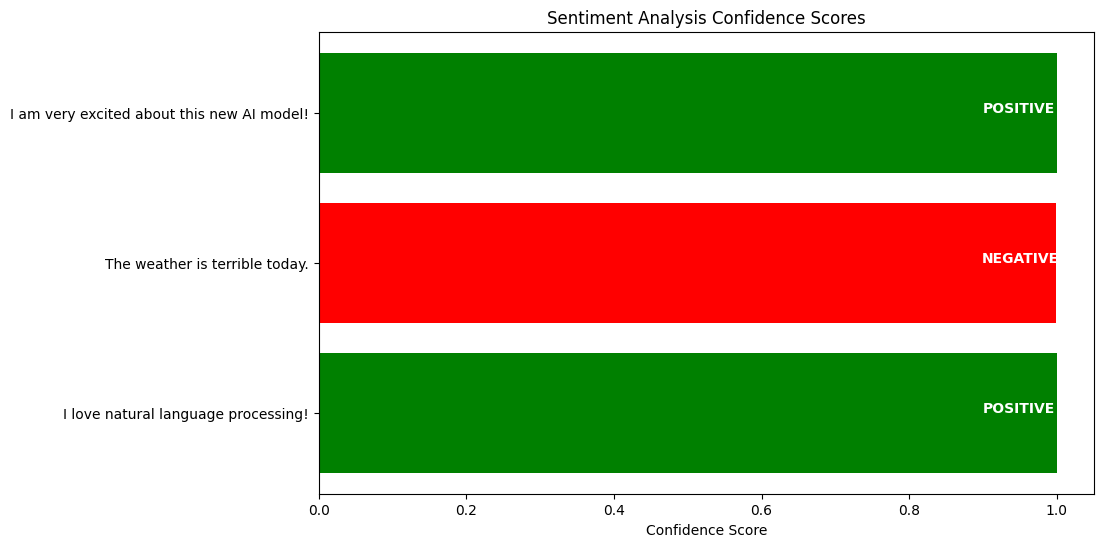

In [84]:
import matplotlib.pyplot as plt

# Data for visualization (based on your sentiment analysis results)
texts = [
    "I love natural language processing!",
    "The weather is terrible today.",
    "I am very excited about this new AI model!"
]
sentiments = ["POSITIVE", "NEGATIVE", "POSITIVE"]
scores = [0.9999, 0.9987, 0.9998]

# Create a bar chart
plt.figure(figsize=(10, 6))

# Generate bar chart with sentiment labels as colors
colors = ['green' if sentiment == 'POSITIVE' else 'red' for sentiment in sentiments]
plt.barh(texts, scores, color=colors)

# Labeling the chart
plt.xlabel('Confidence Score')
plt.title('Sentiment Analysis Confidence Scores')

# Add sentiment labels to each bar
for i in range(len(scores)):
    plt.text(scores[i] - 0.1, i, sentiments[i], color='white', fontweight='bold')

# Display the plot
plt.show()


# **6. Project Alignment and Evaluation**


*   **Ethical Considerations:** Since BERT uses pre-trained data, biases present in the training data may surface in its predictions. Careful consideration must be taken in domains like medical or legal fields where misinformation could lead to harmful decisions.
*   **Best Practices:** Pre-processing of text, careful model evaluation, and tuning hyperparameters are necessary to ensure the model generalizes well across tasks.

# **7. Conclusion and Insights**


*   **Findings:** BERT shows strong contextual understanding, performing well on tasks like sentiment analysis and masked language modeling. It can predict masked words effectively and classifies sentiments with high confidence.
*   **Applications:** BERT can be used in applications such as chatbots, sentiment analysis systems, and information retrieval. However, its limitations in domain-specific knowledge without fine-tuning highlight areas for improvement.
*   **Potential Improvements:** Fine-tuning BERT on specific domains (e.g., legal or medical texts) can improve performance. Additionally, integrating larger models like RoBERTa or T5 can enhance contextual predictions further.



